In [1]:
#% matplotlib inline
import os,glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cmx

import h5py
aa=np.asarray
from VUE.py_model.Procedure import *
from VUE.py_model.PlentyResults import *
from VUE.py_model.Aux_ParametersStructure import *

import pyperplot as ppp

figs_folder='figs/sim'
mk=ppp.Marker('fig.yml')


rs=RSimulation(synthesis_all,'VUE/sim_data/sim_k_a_f_cross')

num_points=rs.params.__len__()
xyz=np.zeros([num_points,3])
xyz_up_props=np.zeros(num_points)
xyz_rtdiff=np.zeros(num_points)
for i,data in enumerate(rs.datas):
    param=rs.params[i]
    ps=param['ps']
    xyz[i]=[param['k'],param['a'][0],param['frus']]
    V0,V,D,EVnext,Rh_left,Rh_right,EV2c,prob_left,rho_,V02,V2,D2,EVnext2,Rh_left2,Rh_right2,EV2c2,prob_left2,rho2_,V0_std,V_std,D_std,EVnext_std,Rh_left_std,Rh_right_std,EV2c_std,prob_left_std,rho_std,g_uppers,g_lowers,g_inners,g_uppers2,g_lowers2,g_inners2,g_uppers_std,g_lowers_std,g_inners_std,t_vec,prob_upper,prob_lower,prob_inner,up_prop,xbar,xbar2,g_ul_mu,g_ul_sigma,g_inners_mu,g_inners_sigma,g_ul_std_mu,g_ul_std_sigma,cr_opt,cr_std=data

    xyz_up_props[i]=np.sum(up_prop*ps)
    pdf_opt=np.sum((g_uppers+g_lowers).T*ps,axis=1)
    
    pdf_ur=np.sum(g_inners.T*ps,axis=1)
    xyz_rtdiff[i]=MinMaxMeanDiff(pdf_opt,pdf_ur)

xyz_rtdiff[np.isnan(xyz_rtdiff)]=np.nanmax(xyz_rtdiff)
    

def scatter3d(fig,ax,x,y,z, cs, term,colorsMap='viridis',precision='.1',y_pos=-0.2,mx=100):
    cm = plt.get_cmap(colorsMap)
    cNorm = mpl.colors.Normalize(vmin=np.nanmin(cs), vmax=np.nanmax(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs),s=20+(cs-np.min(cs))*mx,alpha=0.8)
    ax.set(xlabel='$k$',ylabel='$R$',zlabel='$f$')
    scalarMap.set_array(cs)
    cbar=fig.colorbar(scalarMap)
    barfmt=f"%{precision}f"
    cbar.ax.set_yticklabels([barfmt%(i) for i in cbar.get_ticks()])
    cbar.ax.set_title(term,y=y_pos,fontsize=10)
    ax.view_init(30,40)
    plt.show()


/home/flumer/Documents/Project/UncertaintyHuman/VUE/py_model/Aux_ParametersStructure.py:33: RuntimeWarning: invalid value encountered in true_divide
  mean_seq1=np.sum(seq1*(np.arange(seq1.shape[0])-mins)/(maxs-mins))/seq1.sum()
/home/flumer/Documents/Project/UncertaintyHuman/VUE/py_model/Aux_ParametersStructure.py:35: RuntimeWarning: invalid value encountered in true_divide
  mean_seq2=np.sum(seq2*(np.arange(seq2.shape[0])-mins)/(maxs-mins))/seq2.sum()


# Figure S5B

/tmp/ipykernel_546226/207190066.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([barfmt%(i) for i in cbar.get_ticks()])


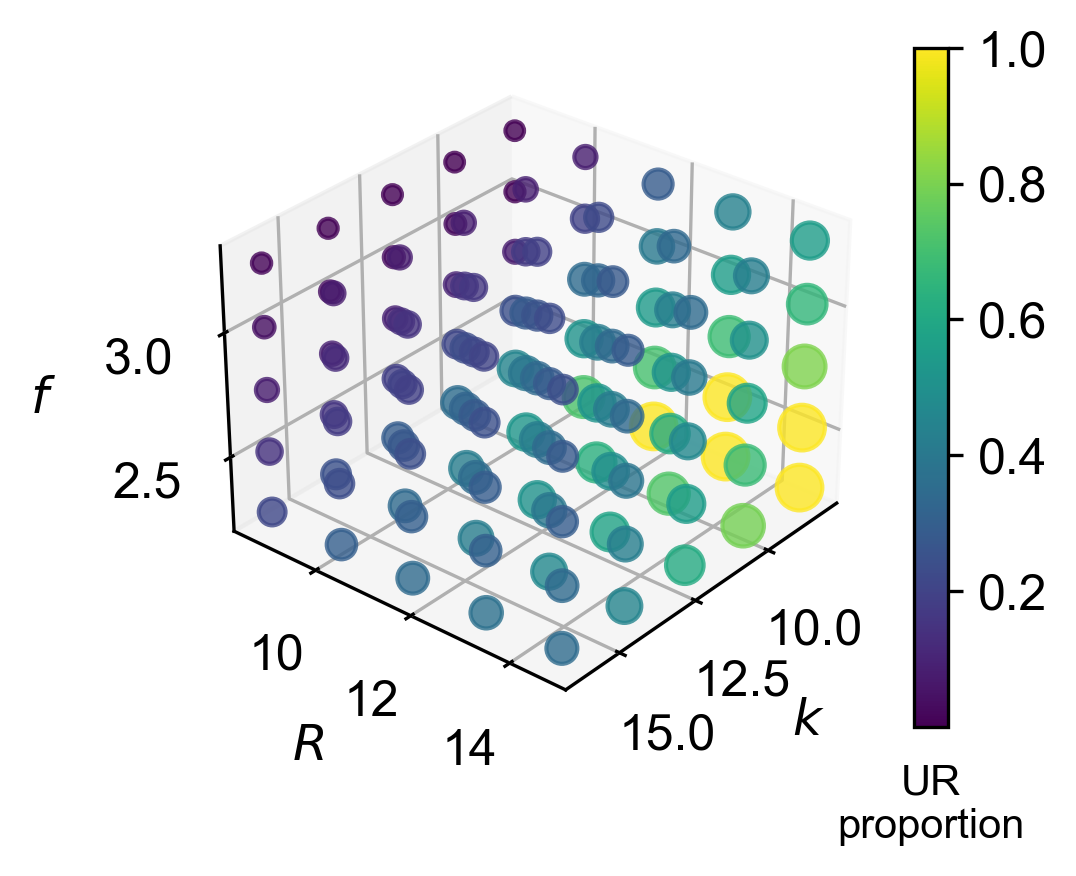

figs/sim/SIM_UR_AREAS_3D.svg figs/sim/SIM_UR_AREAS_3D.svg
figure used in paper is stored in paper_figs/supp/fig5/B.svg


In [2]:

with ppp.SF("SIM_UR_AREAS_3D",figs_folder,mk,subplot_kw={"projection": "3d"},figsize=(4,3)) as (fig,axes):
    scatter3d(fig,axes,xyz[:,0],xyz[:,1],xyz[:,2],xyz_up_props,term="UR\nproportion",mx=100)


# Figure S5C

/tmp/ipykernel_546226/207190066.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([barfmt%(i) for i in cbar.get_ticks()])


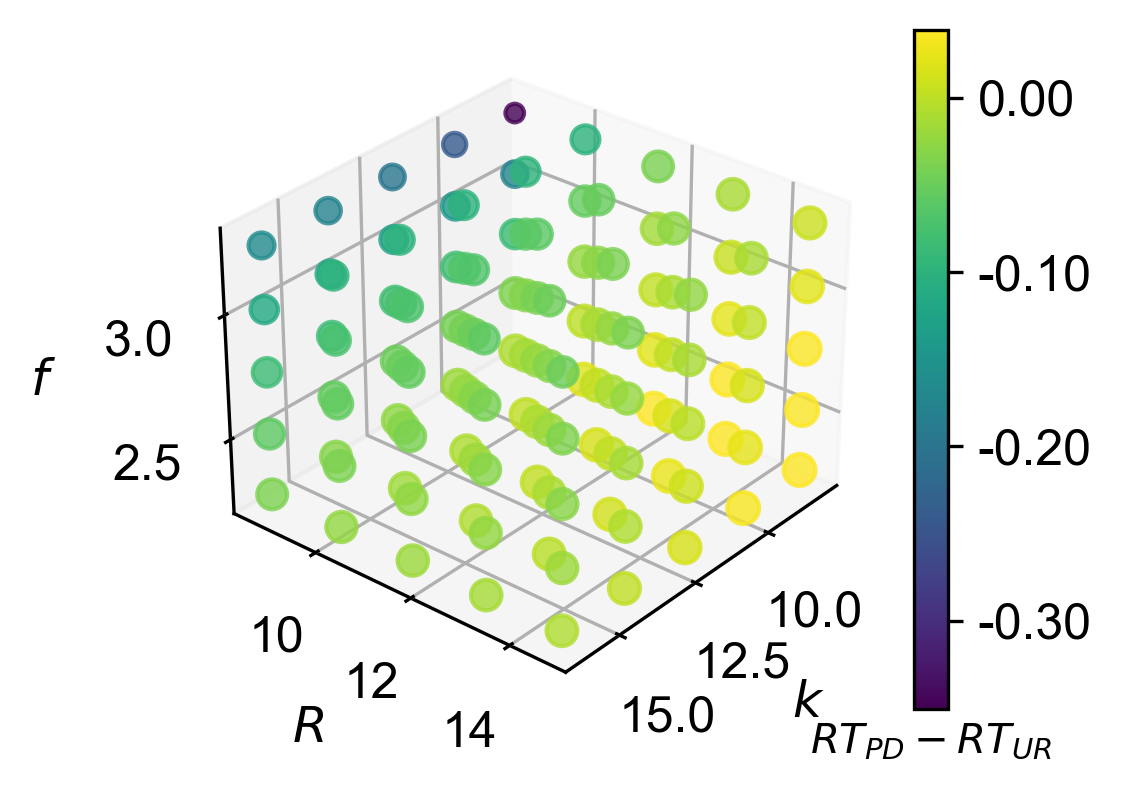

figs/sim/SIM_RTdiff_3D.svg figs/sim/SIM_RTdiff_3D.svg
figure used in paper is stored in paper_figs/supp/fig5/C.svg


In [3]:
with ppp.SF("SIM_RTdiff_3D",figs_folder,mk,subplot_kw={"projection": "3d"},figsize=(4,3)) as (fig,axes):
    scatter3d(fig,axes,xyz[:,0],xyz[:,1],xyz[:,2],xyz_rtdiff,term="$RT_{PD}-RT_{UR}$",precision=.2,y_pos=-0.1,mx=100)


# Figure 5B & S5DE

In [4]:

#%%
fns=['sim_a_f','sim_k_f','sim_k_a']

norm=lambda x:x/x.sum()
uniparams={"c":1,
    "rho":0,
    "tw1":1,
    "tw2":1,
    "tu":0.1,
    "zs":aa([-0.26,-0.16,-0.12,-0.10,-0.08,-0.06,-0.04,-0.02,0,0.02,0.04,0.06,0.08,0.10,0.12,0.16,0.26]),
    "ps":norm(aa([1.,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1])),
    "zs2":aa([-0.26,0.26]),
    "ps2":aa([0.5,0.5]),
    "sigma":1.,
    "num_states":351,
    "delta_t":0.02,
    "stop_val":10,
    "stop_cutoff":0,
    "xbar":5.}

figs/sim/SIM_SYN_UR_AREAS_k.svg figs/sim/SIM_SYN_UR_AREAS_k.svg
figure used in paper is stored in paper_figs/supp/fig5/E.svg
figs/sim/SIM_SYN_UR_AREAS_a.svg figs/sim/SIM_SYN_UR_AREAS_a.svg
figure used in paper is stored in paper_figs/supp/fig5/D.svg
figure used in paper is stored in paper_figs/fig5/B.svg


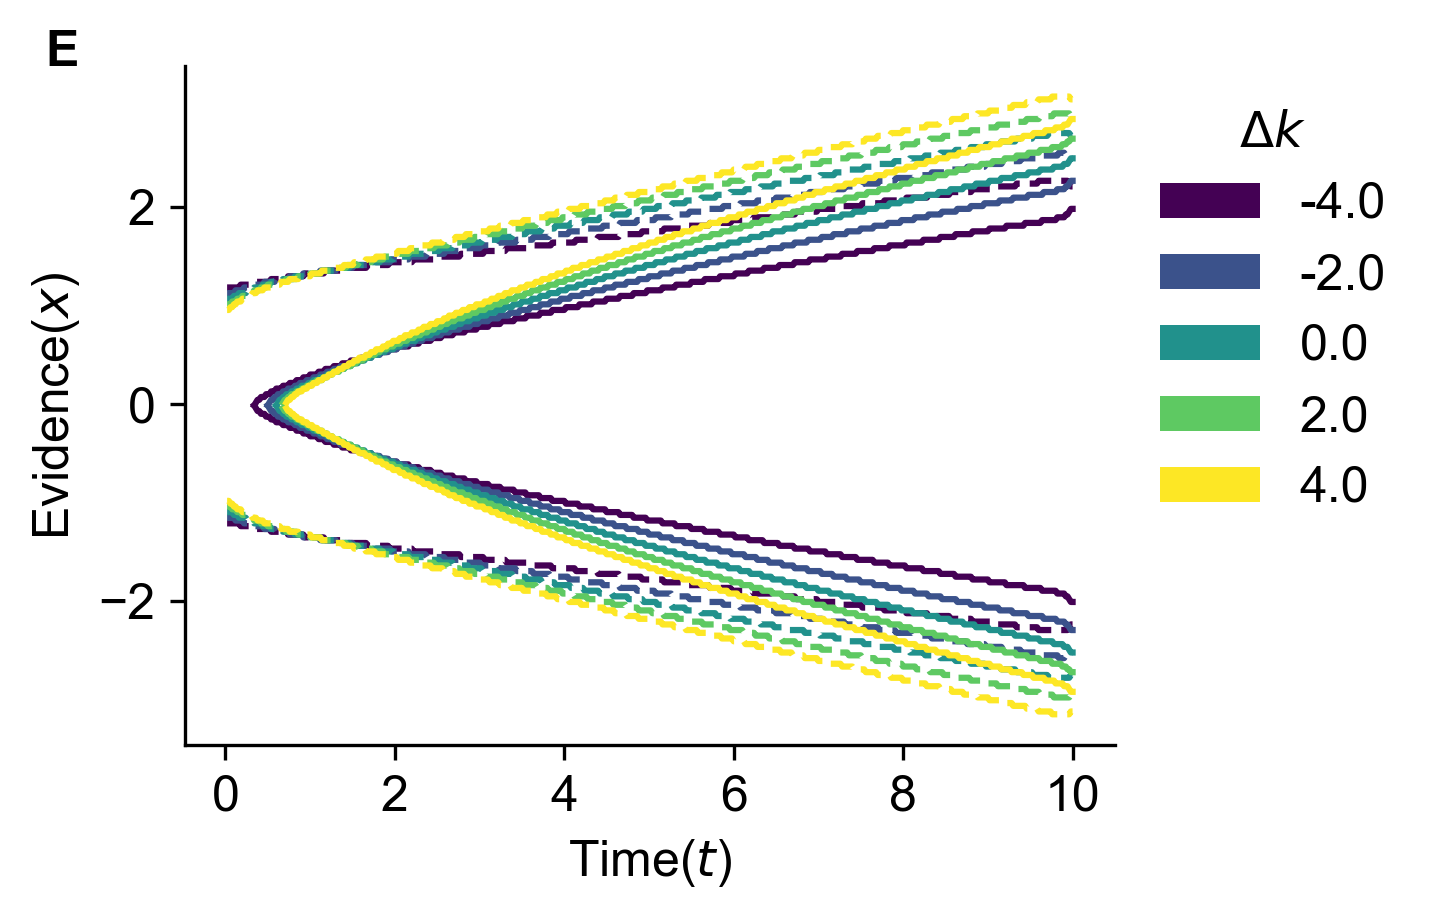

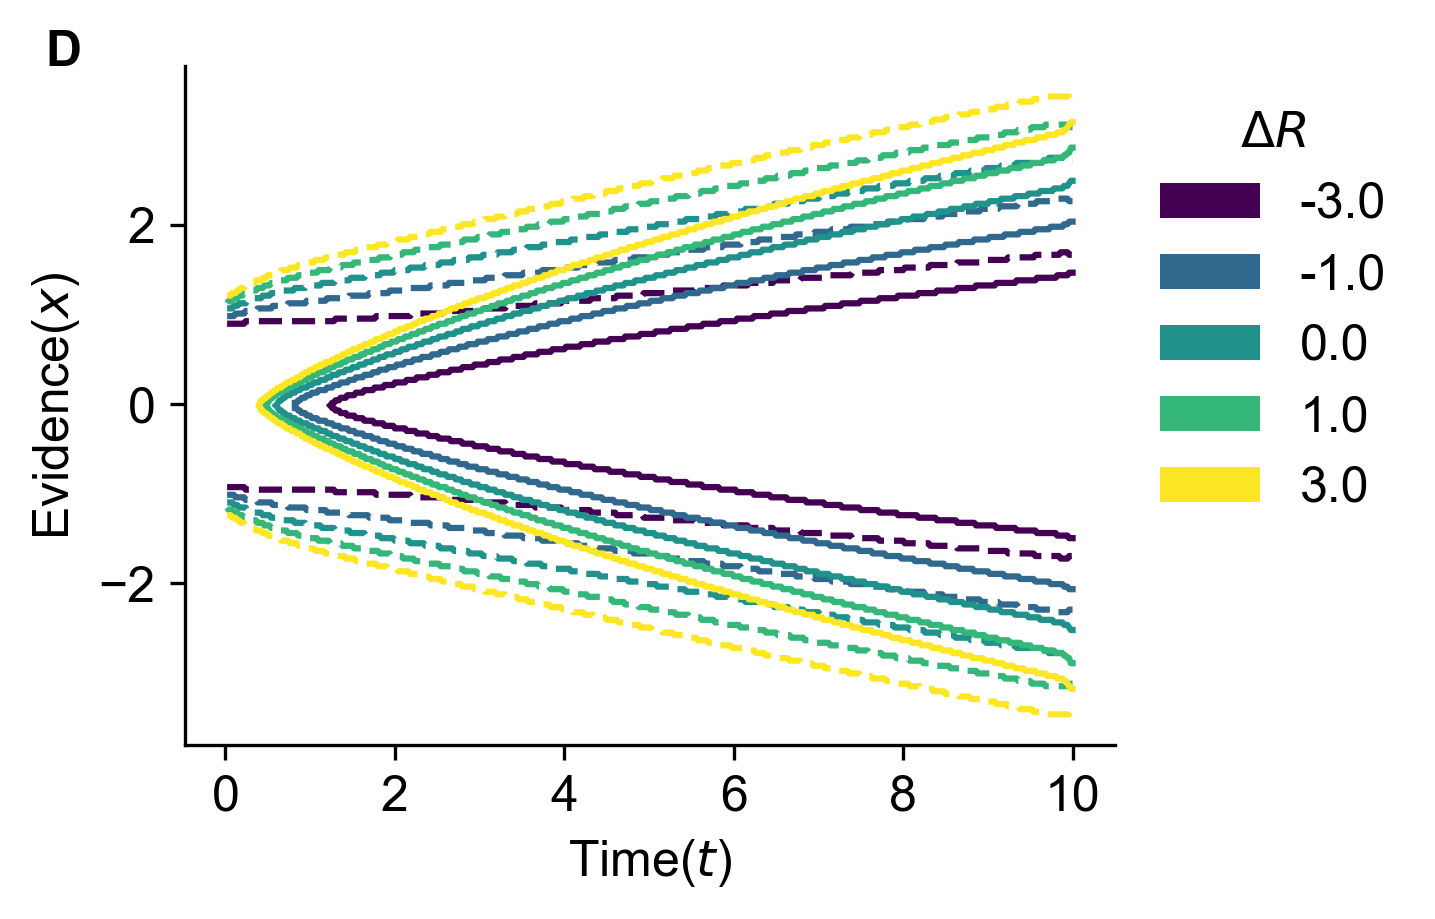

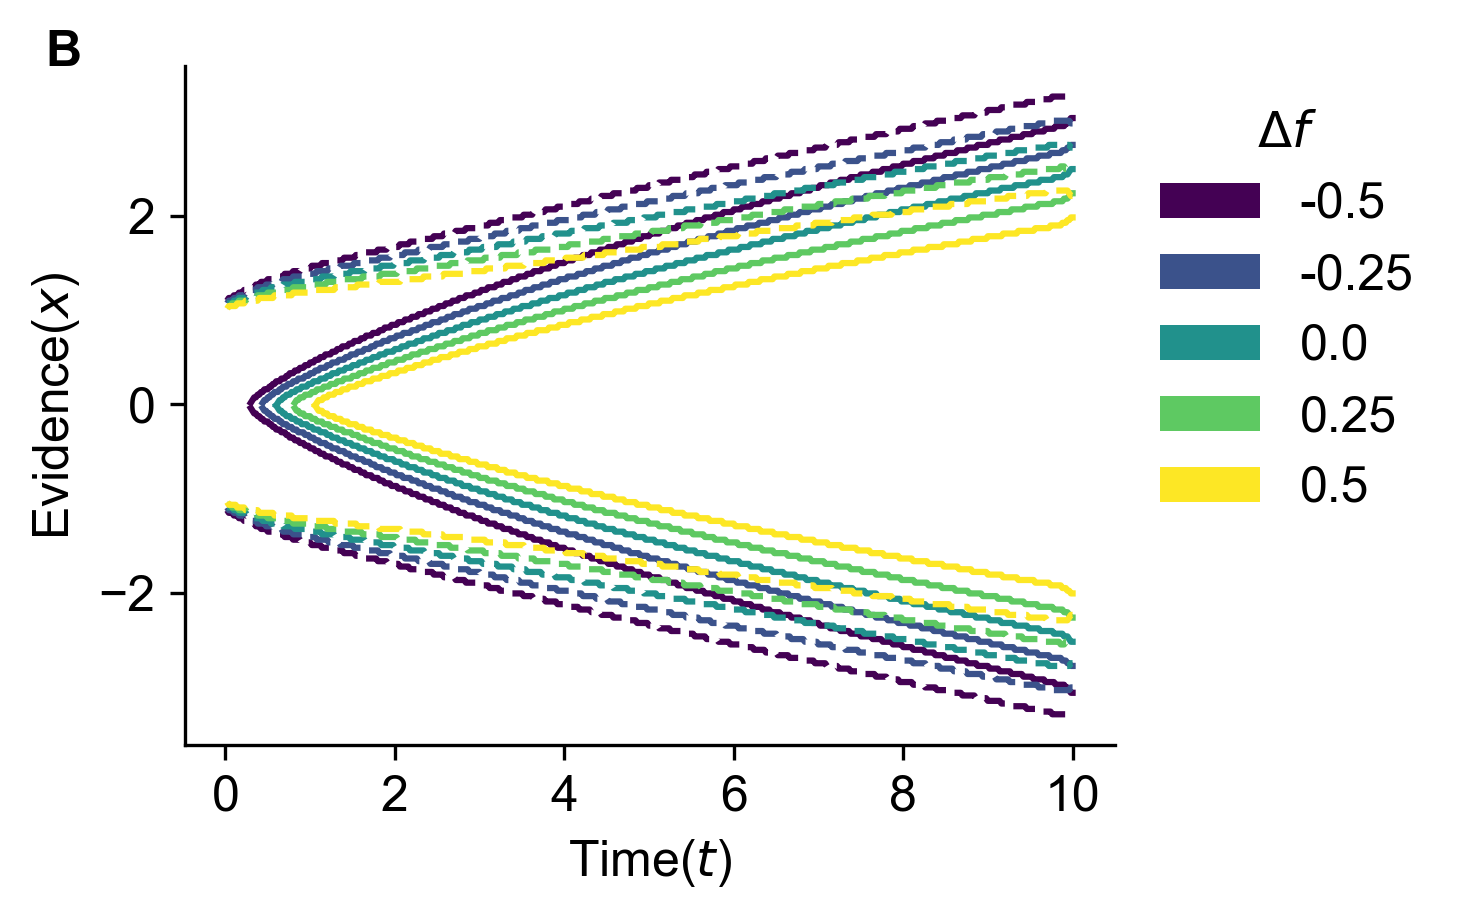

In [5]:

h5file=h5py.File(f"VUE/res/sall/bps.jld","r")
k,R,EV2all,nondt,frus=h5file['best_params'][()]

dk_set=aa([-4,-2,0.,2,4])
k_set=k+dk_set # ok
dR_set=aa([-3,-1,0.,1,3])
R_set=R+dR_set # ok
dfrus_set=aa([-0.5,-0.25,0,0.25,0.5])
frus_set=frus+dfrus_set # ok
dp_set=[dk_set,dR_set,dfrus_set]
p_set=[k_set,R_set,frus_set]
Daxes_kwargs={'xlabel':'Time($t$)','ylabel':'Evidence($x$)'}
term_dict={'k':'$\Delta k$','a':'$\Delta R$','frus':'$\Delta f$'}
terms=['k','a','frus']

continuousLegendQ=False
for i in range(3):

    term=terms[i]
    sims_folder=os.path.join('VUE/sim_data',fns[i])
    fig_folder=f'figs/sim'
    with ppp.SF(f"SIM_SYN_UR_AREAS_{terms[i]}",fig_folder,mk,figsize=(4,3)) as (fig,axes):
        cm = plt.get_cmap("viridis")
        rs=RSimulation(synthesis_all,sims_folder)

        cNorm = mpl.colors.Normalize(vmin=np.min(p_set[i]), vmax=np.max(p_set[i]))
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
        thecolor=[scalarMap.to_rgba(c) for c in p_set[i]]
        for j,data in enumerate(rs.datas):
            param=rs.params[j]

            V0,V,D,EVnext,Rh_left,Rh_right,EV2c,prob_left,rho_,V02,V2,D2,EVnext2,Rh_left2,Rh_right2,EV2c2,prob_left2,rho2_,V0_std,V_std,D_std,EVnext_std,Rh_left_std,Rh_right_std,EV2c_std,prob_left_std,rho_std,g_uppers,g_lowers,g_inners,g_uppers2,g_lowers2,g_inners2,g_uppers_std,g_lowers_std,g_inners_std,t_vec,prob_upper,prob_lower,prob_inner,up_prop,xbar,xbar2,g_ul_mu,g_ul_sigma,g_inners_mu,g_inners_sigma,g_ul_std_mu,g_ul_std_sigma,cr_opt,cr_std=data

            t_ticks=np.linspace(0,uniparams['stop_val']-uniparams['stop_cutoff'],D.shape[0])
            x_ticks=np.linspace(-uniparams['xbar'],uniparams['xbar'],D.shape[1])

            a_upper,a_lower,a_inner_upper,a_inner_lower=transfer_D_to_bounds(D)
            
            a_upper=a_upper.astype(float);a_lower=a_lower.astype(float)
            a_inner_upper=a_inner_upper.astype(float);a_inner_lower=a_inner_lower.astype(float)

            a_upper[a_upper==-1.]=np.nan;a_lower[a_lower==-1.]=np.nan
            a_inner_upper[a_inner_upper==-1.]=np.nan;a_inner_lower[a_inner_lower==-1.]=np.nan
            
            a_upper=-xbar+2*xbar*(a_upper/D.shape[0]);a_lower=-xbar+2*xbar*(a_lower/D.shape[0])
            a_inner_upper=-xbar+2*xbar*(a_inner_upper/D.shape[0]);a_inner_lower=-xbar+2*xbar*(a_inner_lower/D.shape[0])
            
            Dcf_kwargs={'color':thecolor[j]}
            Daxes_kwargs={'xlabel':'Time($t$)','ylabel':'Evidence($x$)'}
            axes.plot(t_vec,a_upper,'--',**Dcf_kwargs);axes.plot(t_vec,a_lower,'--',**Dcf_kwargs)
            axes.plot(t_vec,a_inner_lower,**Dcf_kwargs);axes.plot(t_vec,a_inner_upper,**Dcf_kwargs)
            axes.set(**Daxes_kwargs)

        if continuousLegendQ:
            scalarMap.set_array(p_set[i])
            cbar=fig.colorbar(scalarMap)
            cbar.ax.set_yticklabels(["{:.1f}".format(i) for i in cbar.get_ticks()])
            cbar.ax.set_title(f'{term_dict[term]}',y=-0.1,fontsize=10)
        else:
            proxy=[plt.Rectangle((0,0),1,1,fc = pc) 
                for i,pc in enumerate(thecolor)]
            axes.legend(proxy, dp_set[i],bbox_to_anchor=(1,1),title=term_dict[term])
    

# Figure 5D & S4BC

figs/sim/SIM_RTdiffURprop_lr_ur_k.svg figs/sim/SIM_RTdiffURprop_lr_ur_k.svg
figure used in paper is stored in paper_figs/supp/fig4/C.svg
figs/sim/SIM_RTdiffURprop_lr_ur_a.svg figs/sim/SIM_RTdiffURprop_lr_ur_a.svg
figure used in paper is stored in paper_figs/supp/fig4/B.svg
figure used in paper is stored in paper_figs/fig5/D.svg


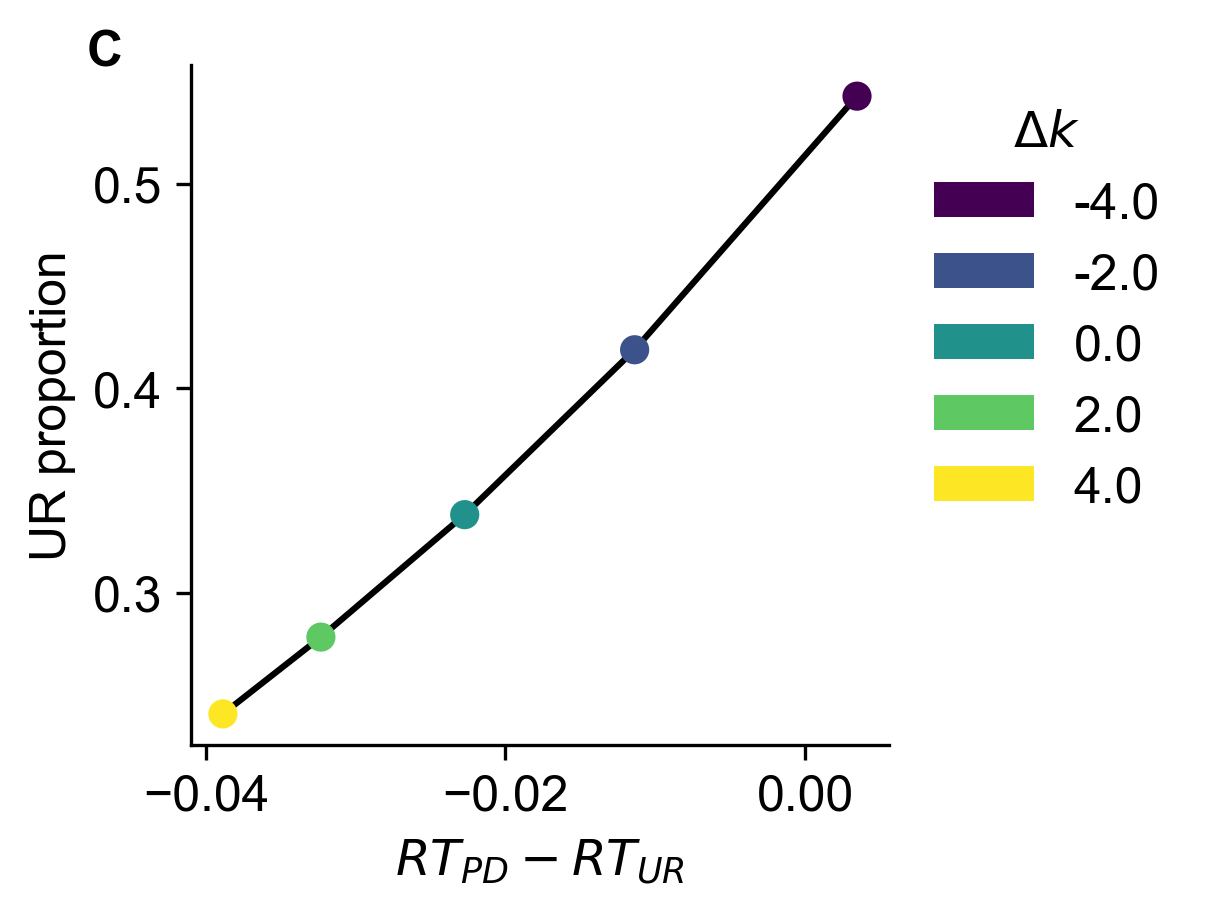

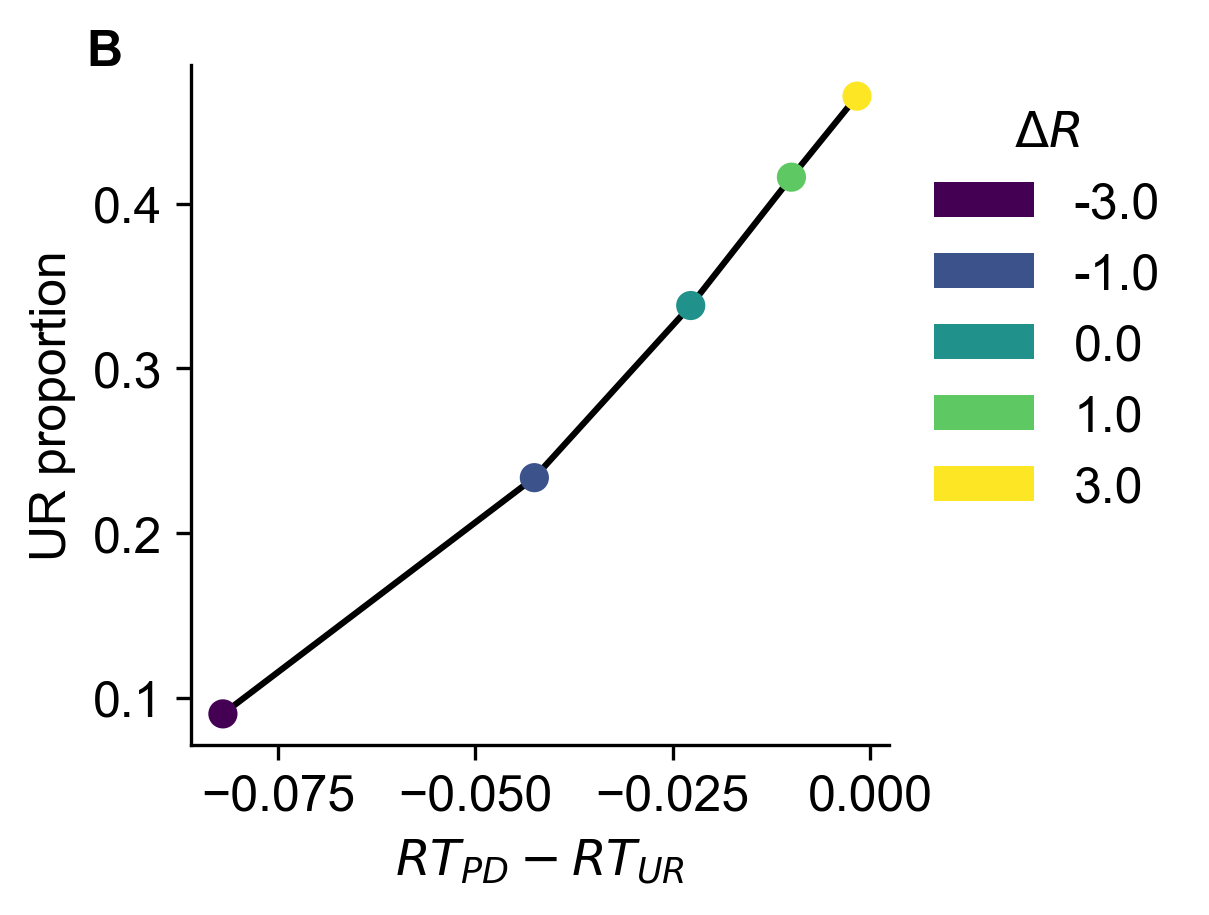

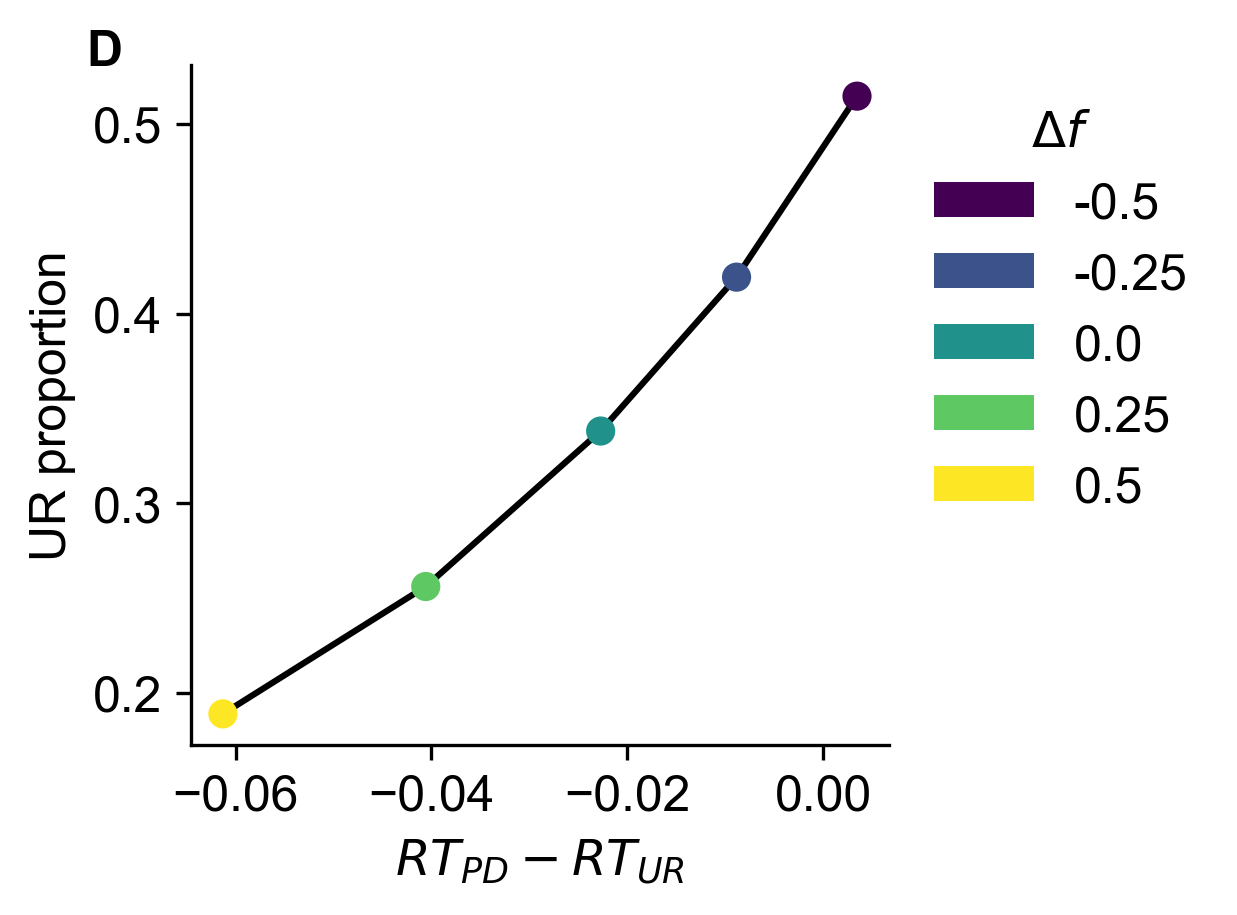

In [6]:
for i in range(3):
    rt_diff=[]
    UR_prop=[]
    changed_param=[]

    term=terms[i]
    sims_folder=os.path.join('VUE/sim_data',fns[i])
    fig_folder=f'figs/sim'
    with ppp.SF(f"SIM_RTdiffURprop_lr_ur_{terms[i]}",fig_folder,mk,figsize=(3,3)) as (fig,ax):
        cm = plt.get_cmap("viridis")
        rs=RSimulation(synthesis_all,sims_folder)

        cNorm = mpl.colors.Normalize(vmin=np.min(p_set[i]), vmax=np.max(p_set[i]))
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
        thecolor=[scalarMap.to_rgba(c) for c in p_set[i]]
        for j,data in enumerate(rs.datas):
            param=rs.params[j]

            V0,V,D,EVnext,Rh_left,Rh_right,EV2c,prob_left,rho_,V02,V2,D2,EVnext2,Rh_left2,Rh_right2,EV2c2,prob_left2,rho2_,V0_std,V_std,D_std,EVnext_std,Rh_left_std,Rh_right_std,EV2c_std,prob_left_std,rho_std,g_uppers,g_lowers,g_inners,g_uppers2,g_lowers2,g_inners2,g_uppers_std,g_lowers_std,g_inners_std,t_vec,prob_upper,prob_lower,prob_inner,up_prop,xbar,xbar2,g_ul_mu,g_ul_sigma,g_inners_mu,g_inners_sigma,g_ul_std_mu,g_ul_std_sigma,cr_opt,cr_std=data

            pdf_std=np.sum((g_uppers_std+g_lowers_std).T*ps,axis=1)
            pdf_opt=np.sum((g_uppers+g_lowers).T*ps,axis=1)
            pdf_ur=np.sum(g_inners.T*ps,axis=1)
            tmp=MinMaxMeanDiff(pdf_opt,pdf_ur)
            
            rt_diff.append(tmp)
            UR_prop.append(np.sum(up_prop*ps))
            changed_param.append(param[term])
        
        res=np.c_[rt_diff,UR_prop,changed_param]
        res=res[res[:, 2].argsort()]

        ax.plot(res[:,0],res[:,1],color='k')
        ax.set(xlabel="$RT_{PD}-RT_{UR}$",ylabel="UR proportion")
        val=res[:,2]
        
        cm = plt.get_cmap('viridis')
        cNorm = mpl.colors.Normalize(vmin=val.min(),vmax=val.max())
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
        thecolor=[scalarMap.to_rgba(v) for v in val]
        
        ax.scatter(res[:,0],res[:,1],c=thecolor,zorder=4)

        proxy=[plt.Rectangle((0,0),1,1,fc = pc) 
            for i,pc in enumerate(thecolor)]
        ax.legend(proxy,dp_set[i],bbox_to_anchor=(1,1),title=term_dict[term])

            

# Figure S3

This may take a while ....

In [7]:
import statsmodels.formula.api as smf
import settings

figs/sim/SIM_URpropSig_k.svg figs/sim/SIM_URpropSig_k.svg
figure used in paper is stored in paper_figs/supp/fig3/B.svg
figs/sim/SIM_URpropSig_a.svg figs/sim/SIM_URpropSig_a.svg
figure used in paper is stored in paper_figs/supp/fig3/A.svg
figs/sim/SIM_URpropSig_frus.svg figs/sim/SIM_URpropSig_frus.svg
figure used in paper is stored in paper_figs/supp/fig3/C.svg


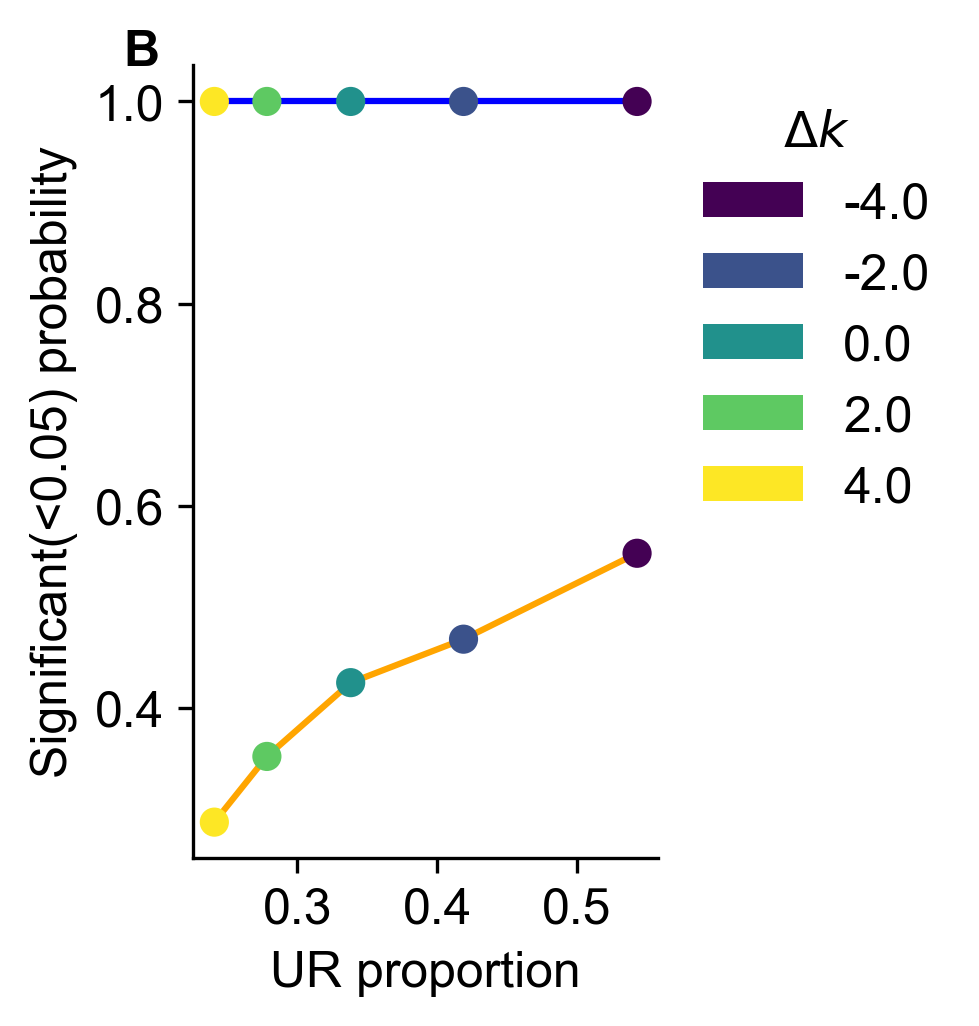

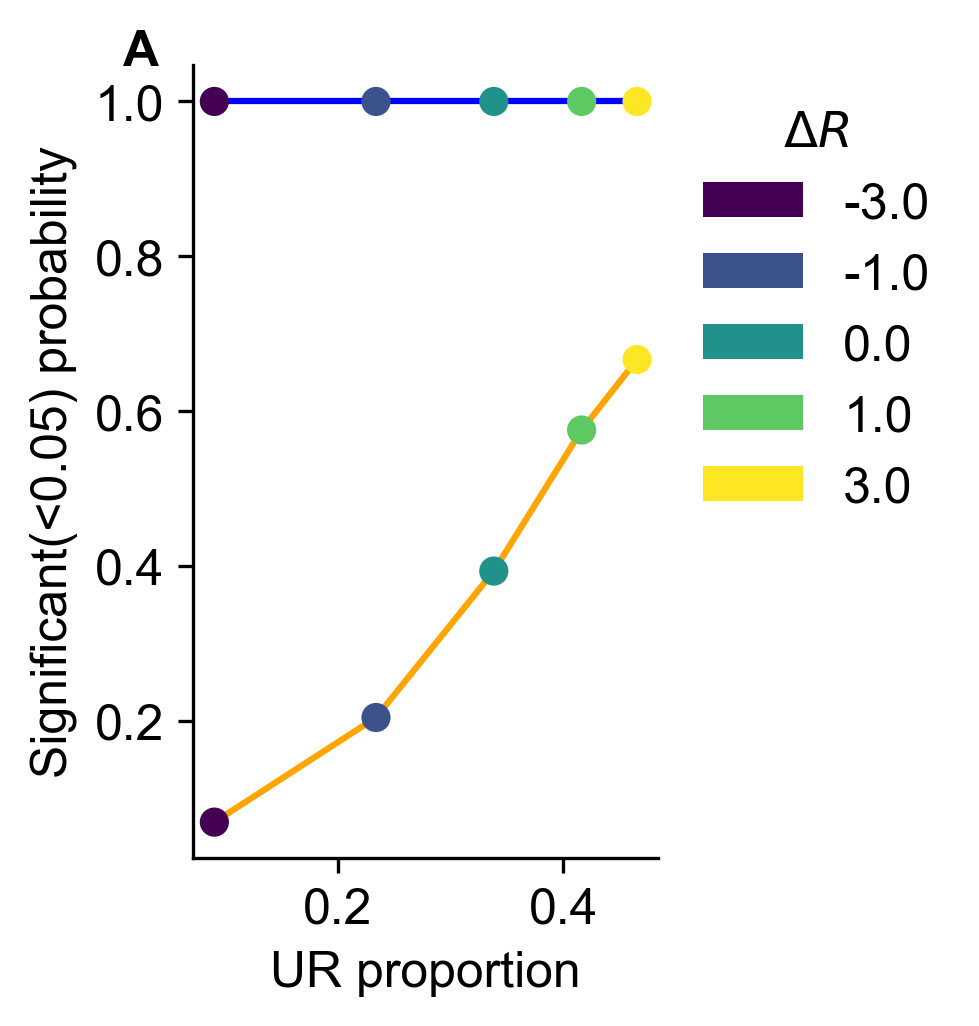

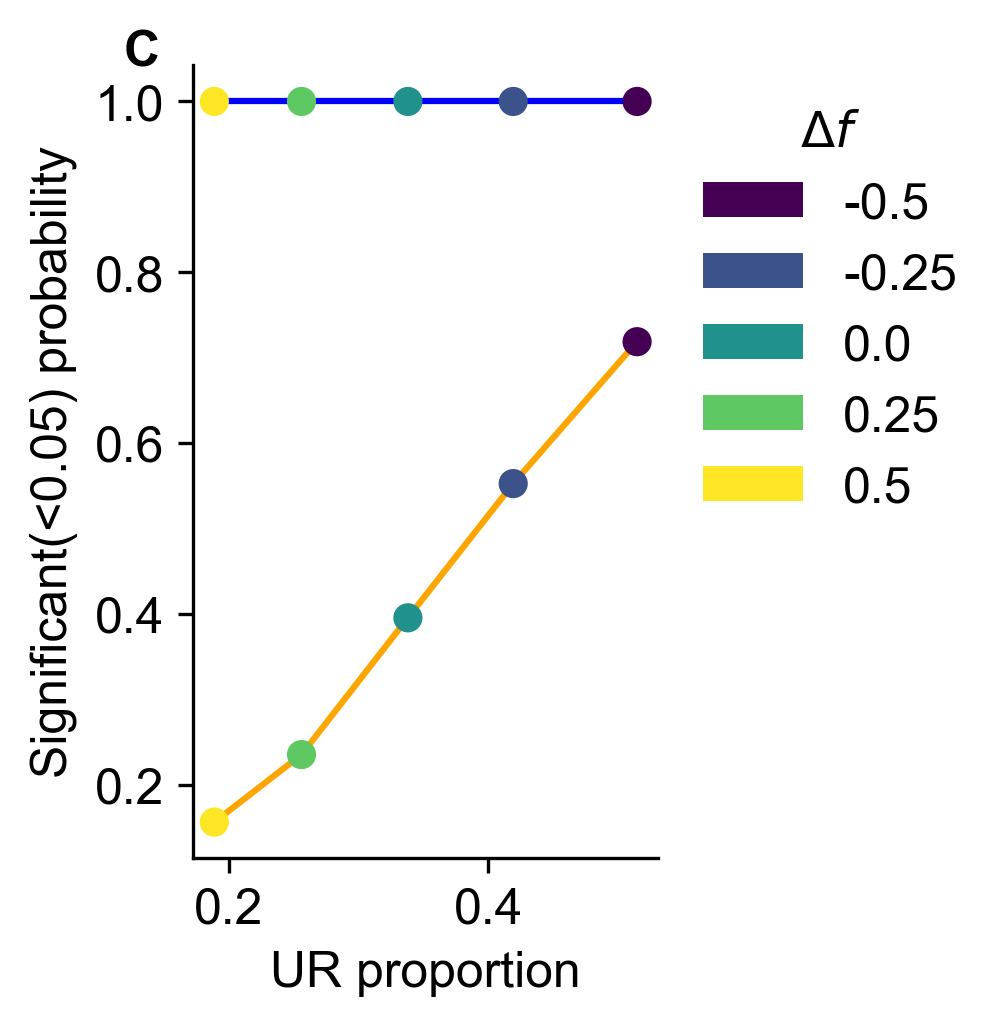

In [8]:
ss=2500
trys=1000

for j in range(3):
    rt_diff=[]
    UR_prop=[]
    changed_param=[]

    term=terms[j]
    sims_folder=os.path.join('VUE/sim_data',fns[j])
    fig_folder='figs/sim'

    rs=RSimulation(synthesis_all,sims_folder)

    with ppp.SF(f"SIM_URpropSig_{term}",fig_folder,mk,figsize=(2,3.5)) as (fig,ax):
        sig_outers=[]
        sig_inners=[]
        UR_prop=[]
        changed_param=[]
        for i,data in enumerate(rs.datas):
            param=rs.params[i]

            V0,V,D,EVnext,Rh_left,Rh_right,EV2c,prob_left,rho_,V02,V2,D2,EVnext2,Rh_left2,Rh_right2,EV2c2,prob_left2,rho2_,\
                V0_std,V_std,D_std,EVnext_std,Rh_left_std,Rh_right_std,EV2c_std,prob_left_std,rho_std,\
                    g_uppers,g_lowers,g_inners,g_uppers2,g_lowers2,g_inners2,g_uppers_std,g_lowers_std,g_inners_std,t_vec,\
                        prob_upper,prob_lower,prob_inner,up_prop,xbar,xbar2,g_ul_mu,g_ul_sigma,g_inners_mu,g_inners_sigma,g_ul_std_mu,g_ul_std_sigma,cr_opt,cr_std=data
            
            pvalue_inners=[]
            pvalue_outers=[]
            
            UR_prop.append(np.sum(up_prop*ps))
                
            for _ in range(trys):
                
                df_inners=GenRTCohsSample(g_inners,ps,uniparams['zs'],up_prop,uniparams['delta_t'],uniparams['stop_val'],uniparams['stop_cutoff'],size=int(ss*UR_prop[-1]),remove_up026=False)
                df_outers=GenRTCohsSample(g_lowers+g_uppers,ps,uniparams['zs'],1-up_prop,uniparams['delta_t'],uniparams['stop_val'],uniparams['stop_cutoff'],size=int(ss*(1-UR_prop[-1])),remove_up026=False)

                model_inners=smf.ols('rt~cohs',data=df_inners).fit()
                model_outers=smf.ols('rt~cohs',data=df_outers).fit()
                pvalue_inners.append(model_inners.pvalues['cohs'])
                pvalue_outers.append(model_outers.pvalues['cohs'])
            sig_inners.append((aa(pvalue_inners)<0.05).sum()/trys)
            sig_outers.append((aa(pvalue_outers)<0.05).sum()/trys)
            changed_param.append(param[term])

        res=np.c_[UR_prop,sig_inners,sig_outers,changed_param]
        res=res[res[:, 3].argsort()]

        ax.plot(res[:,0],res[:,1],color=settings.color_map['opt-up up'],label=settings.label_map['opt-up up'])
        ax.plot(res[:,0],res[:,2],color=settings.color_map['opt-up lr'],label=settings.label_map['opt-up lr'])
        ax.set(xlabel=f"UR proportion",ylabel=f"Significant(<0.05) probability")
        ax.legend(bbox_to_anchor=(1.5,1))
        val=res[:,3]

        cm = plt.get_cmap('viridis')
        cNorm = mpl.colors.Normalize(vmin=val.min(),vmax=val.max())
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
        thecolor=[scalarMap.to_rgba(v) for v in val]

        ax_color=ax.scatter(res[:,0],res[:,1],c=thecolor,zorder=4)
        ax.scatter(res[:,0],res[:,2],c=thecolor,zorder=4)

        proxy=[plt.Rectangle((0,0),1,1,fc = pc) for pc in thecolor]
        ax.legend(proxy,dp_set[j],bbox_to_anchor=(1,1),title=term_dict[term])